<a href="https://colab.research.google.com/github/lmarieta/SGD/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stochastic gradient gradient convergence as a function of batch size**

Consider a dataset of 1000 points in three-dimensional space. We choose a model as following: f := ax^2 + by^2 + c, where a, b, c, d are the model parameters. We want to perform a stochastic gradient descent and compare the convergence depending on the batch size. Our loss function is the mean square error MSE = 1/N sum(y-f)^2.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
random.seed(10)
print(random.random())

0.5714025946899135


In [39]:
# Initialization
a0 = 1
b0 = 1
c0 = 0
epochs = 400
alpha = 0.001
N = 100
batch_size = 1


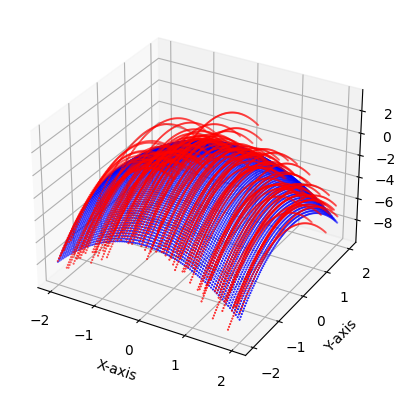

In [40]:
# Generate the raw data

# Step 1: Define the curve function
def prediction(x : float, y : float, a : float, b : float, c : float):
    return - a*x**2 - b*y**2 - c

# Step 2: Generate random noise
x = np.linspace(-2, 2, N)  # X values along the curve
y = np.linspace(-2, 2, N)  # X values along the curve
x, y = np.meshgrid(x, y)
noise_stddev = 1  # Standard deviation of the noise
noise = np.random.normal(0, noise_stddev, N)  # Generate random noise

# Step 3: Add the noise to the curve points
z = prediction(x, y, a0, b0, c0) + noise
z_model = prediction(x, y, a0, b0, c0)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D surface plot
surf = ax.scatter(x, y, z, c='r', marker='.', s=1)
surf_model = ax.scatter(x, y, z_model, c='b', marker='.', s=1)

# Add labels and a color bar
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

In [41]:
def MSE_loss(x : float, y : float, a : float, b : float, c : float, target : float):
  loss = 0
  for i in range(0, len(target)):
    for j in range(0, len(target)):
      loss += (target[i,j]-prediction(x[i,j], y[i,j], a, b, c))**2
  loss = loss / (len(target)**2)
  return loss

def dMSE_da(x : float, y : float, a : float, b : float, c : float, target : float):
  dmse_da = 0
  for i in range(0, len(target)):
    for j in range(0, len(target)):
      dmse_da += 2 * (target[i,j]-prediction(x[i,j], y[i,j], a, b, c))*(x[i,j]**2)
  dmse_da = dmse_da / (len(target)**2)
  return dmse_da

def dMSE_db(x : float, y : float, a : float, b : float, c : float, target : float):
  dmse_db = 0
  for i in range(0, len(target)):
    for j in range(0, len(target)):
      dmse_db += 2 * (target[i,j]-prediction(x[i,j], y[i,j], a, b, c))*(y[i,j]**2)
  dmse_db = dmse_db / (len(target)**2)
  return dmse_db

def dMSE_dc(x : float, y : float, a : float, b : float, c : float, target : float):
  dmse_dc = 0
  for i in range(0, len(target)):
    for j in range(0, len(target)):
      dmse_dc += 2 * (target[i,j]-prediction(x[i,j], y[i,j], a, b, c))
  dmse_dc = dmse_dc / (len(target)**2)
  return dmse_dc

In [42]:
class SGD:
    # Constructor method (optional)
    def __init__(self, x : float, y : float, a : float, b : float, c : float, target : float, epochs : int, batch_size : int):
        self.batch_size = batch_size
        self.x = x
        self.y = y
        self.a = a
        self.b = b
        self.c = c
        self.target = target
        self.MSE_loss = [0] * epochs
        self.MSE_loss_grad = [[0] * epochs,[0] * epochs,[0] * epochs]

    # Instance method

    ####################################
    # Shuffle only once
    def compute_MSE(self,x : float, y : float, a : float, b : float, c : float, target : float, k : int):
      x_indices = np.arange(len(target))
      np.random.shuffle(x_indices)
      y_indices = np.arange(len(target))
      np.random.shuffle(y_indices)
      n = self.batch_size**2
      for batch_start in range(0, target.size, n):
        batch_x_indices = x_indices[batch_start:batch_start+n]
        batch_y_indices = y_indices[batch_start:batch_start+n]
        x_batch = x[0,batch_x_indices]
        y_batch = y[batch_y_indices,0]
        target_batch = target[batch_x_indices, :]
        target_batch = target_batch[:,batch_y_indices]
        for i in range(0, len(x_batch)):
          for j in range(0, len(y_batch)):
            self.MSE_loss[k] += (target_batch[i,j]-prediction(x_batch[i], y_batch[j], a, b, c))**2
            self.MSE_loss_grad[0][k] += 2 * (target_batch[i,j]-prediction(x_batch[i], y_batch[j], a, b, c))*(x_batch[j]**2)
            self.MSE_loss_grad[1][k] += 2 * (target_batch[i,j]-prediction(x_batch[i], y_batch[j], a, b, c))*(y_batch[j]**2)
            self.MSE_loss_grad[2][k] += 2 * (target_batch[i,j]-prediction(x_batch[i], y_batch[j], a, b, c))
      self.MSE_loss_grad[0][k] = self.MSE_loss_grad[0][k] / (n)
      self.MSE_loss_grad[1][k] = self.MSE_loss_grad[1][k] / (n)
      self.MSE_loss_grad[2][k] = self.MSE_loss_grad[2][k] / (n)
      self.MSE_loss[k] = self.MSE_loss[k] / (n)


In [43]:
a = 3
b = 2
c = 1
batch_size_all_points = N
all_points_sgd = SGD(x=x, y=y, a=a, b=b, c=c, target=z, epochs=epochs, batch_size=batch_size_all_points)
for k in range(0, epochs):
  all_points_sgd.compute_MSE(x=x, y=y, a=a, b=b, c=c, target=z, k=k)
  a = a - alpha * all_points_sgd.MSE_loss_grad[0][k]
  b = b - alpha * all_points_sgd.MSE_loss_grad[1][k]
  c = c - alpha * all_points_sgd.MSE_loss_grad[2][k]
print(all_points_sgd.MSE_loss[-1])
print(all_points_sgd.MSE_loss_grad[0][-1])

1.5798079631440118
0.6328166140892342


In [44]:
print(a)
print(b)
print(c)

1.5283405942499062
0.6886828001249644
-0.08536432093470164


In [45]:
a = 3
b = 2
c = 1
reduced_points_sgd = SGD(x=x, y=y, a=a, b=b, c=c, target=z, epochs=epochs, batch_size=batch_size)
for k in range(0, epochs):
  reduced_points_sgd.compute_MSE(x=x, y=y, a=a, b=b, c=c, target=z, k=k)
  a = a - alpha * reduced_points_sgd.MSE_loss_grad[0][k]
  b = b - alpha * reduced_points_sgd.MSE_loss_grad[1][k]
  c = c - alpha * reduced_points_sgd.MSE_loss_grad[2][k]
print(reduced_points_sgd.MSE_loss[-1])
print(reduced_points_sgd.MSE_loss_grad[0][-1])

91.89719139168164
-11.067771642071472


In [46]:
print(a)
print(b)
print(c)

0.9871907835066869
1.0460990994806796
-0.07503286698139146


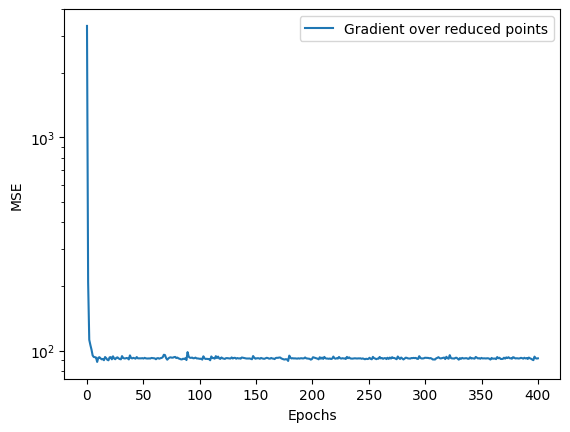

In [47]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Create a plot
#ax.plot(np.linspace(0,epochs,epochs), all_points_sgd.MSE_loss, label = 'Gradient over all data points')
ax.plot(np.linspace(0,epochs,epochs), reduced_points_sgd.MSE_loss, label = 'Gradient over reduced points')

# Set a logarithmic y-axis
ax.set_yscale('log')

# Add labels and a color bar
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')

# Set the legend
ax.legend()

# Show the plot
plt.show()


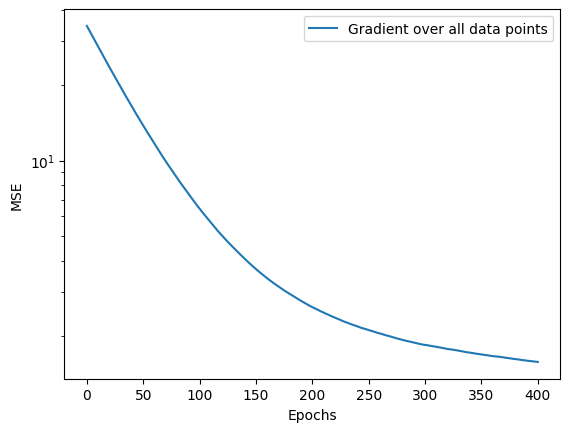

In [48]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Create a plot
ax.plot(np.linspace(0,epochs,epochs), all_points_sgd.MSE_loss, label = 'Gradient over all data points')
#ax.plot(np.linspace(10,epochs,epochs-10), reduced_points_sgd.MSE_loss[10:], label = 'Gradient over reduced points')

# Set a logarithmic y-axis
ax.set_yscale('log')

# Add labels and a color bar
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')

# Set the legend
ax.legend()

# Show the plot
plt.show()